Homework by Chenye Jin. Written in JupyterLab & $\LaTeX$.

# Implement Newton Interpolation

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def newton_interpolation(x, y, x_new):
    n = len(x) # number of data points
    p = y.copy() # copy y or python will use the reference of y which is not what we want
    for k in range(1, n): # k is the degree of the polynomial
        for i in range(n-k): # i is the index of the polynomial
            p[i] = (p[i+1] - p[i]) / (x[i+k] - x[i]) # divided difference
        for i in range(n-k): # i is the index of the polynomial
            p[i+1] = p[i] # shift the polynomial to the left
    
    def eval_poly(x_val):
        result = p[0] 
        for i in range(1, n):
            term = p[i] 
            for j in range(i):
                term *= (x_val - x[j])
            result += term
        return result
    
    return [eval_poly(x_val) for x_val in x_new]

# Define $F1(x) = 2 \cdot sin(x^2) + \cos{\sqrt{x}}$

In [5]:
# 1: f = @(x) 2*sin(x*x) + cos(sqrt(x))
f1 = lambda x: 2*np.sin(x**2) + np.cos(np.sqrt(x))

# Calculate Newton(x): F1

In [6]:
# a) ab = [0 1]
x1a = np.linspace(0, 1, 10)
y1a = f1(x1a)
x_new = np.arange(-0.5, 5.2, 0.2)
p1a = newton_interpolation(x1a, y1a, x_new)

# b) ab = [0.5 1.5]
x1b = np.linspace(0.5, 1.5, 10)
y1b = f1(x1b)
p1b = newton_interpolation(x1b, y1b, x_new)

# Define $F2(x) = e^{\sin{x}} + e^{x^2}$

In [7]:
# 2: f = @(x) exp(sin(x)) + exp(x*x)
f2 = lambda x: np.exp(np.sin(x)) + np.exp(x**2)

# Calculate Newton(x): F2

In [8]:
# a) ab = [0 1.5]
x2a = np.linspace(0, 1.5, 10)
y2a = f2(x2a)
p2a = newton_interpolation(x2a, y2a, x_new)

# b) ab = [1.5 3]
x2b = np.linspace(1.5, 3, 10)
y2b = f2(x2b)
p2b = newton_interpolation(x2b, y2b, x_new)

# Plot final results and original functions

/tmp/ipykernel_5803/2496220368.py:2: RuntimeWarning: invalid value encountered in sqrt
  f1 = lambda x: 2*np.sin(x**2) + np.cos(np.sqrt(x))


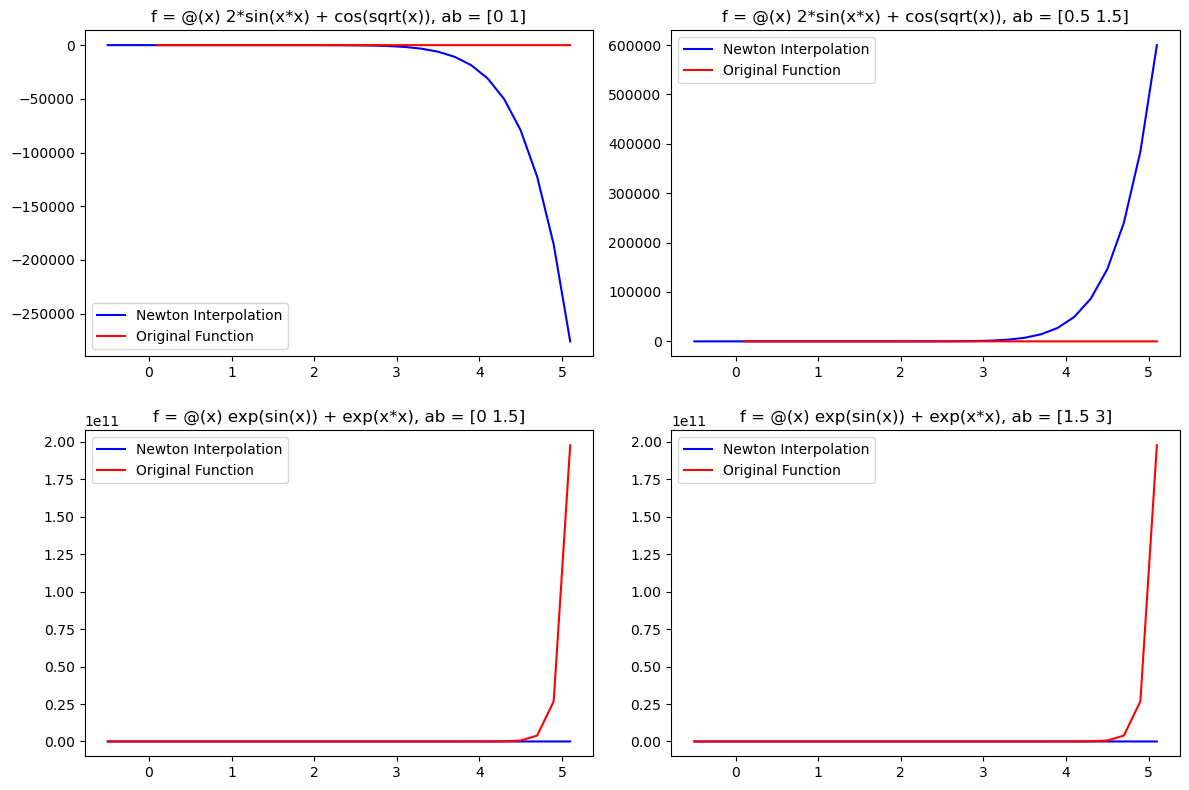

In [11]:
# plot results
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# plot f1

axs[0, 0].plot(x_new, p1a, 'b', label='Newton Interpolation')
axs[0, 0].plot(x_new, f1(x_new), 'r', label='Original Function')
axs[0, 0].set_title('f = @(x) 2*sin(x*x) + cos(sqrt(x)), ab = [0 1]')
axs[0, 0].legend()

axs[0, 1].plot(x_new, p1b, 'b', label='Newton Interpolation')
axs[0, 1].plot(x_new, f1(x_new), 'r', label='Original Function')
axs[0, 1].set_title('f = @(x) 2*sin(x*x) + cos(sqrt(x)), ab = [0.5 1.5]')
axs[0, 1].legend()

# plot f2

axs[1, 0].plot(x_new, p2a, 'b', label='Newton Interpolation')
axs[1, 0].plot(x_new, f2(x_new), 'r', label='Original Function')
axs[1, 0].set_title('f = @(x) exp(sin(x)) + exp(x*x), ab = [0 1.5]')
axs[1, 0].legend()

axs[1, 1].plot(x_new, p2b, 'b', label='Newton Interpolation')
axs[1, 1].plot(x_new, f2(x_new), 'r', label='Original Function')
axs[1, 1].set_title('f = @(x) exp(sin(x)) + exp(x*x), ab = [1.5 3]')
axs[1, 1].legend()

plt.tight_layout()
plt.show()